# Cenpv: Only the controls were used for the overall analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gene = 'Cenpv'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30516994,C57BL/6N,m,control,wt (Cenpv),28.1,93.30,65.05,2.81,1.03
1,30517195,C57BL/6N,m,control,wt (Cenpv),23.7,86.24,53.98,2.76,1.26
2,30517201,C57BL/6N,f,control,wt (Cenpv),22.3,94.08,65.94,2.47,0.83


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30517201,30517201.dcm,2.992733,0.002500,0.887500,0.041667,782.608696,0.002500,0.999984,high,0.999984,high,34.793081,1.488461,95.721964,70.344828,C57BL/6N,f,control,wt (Cenpv),22.3,94.08,65.94,2.47,0.83,0.522733,2.731366,0.057500,0.858750,1.641964,4.404828
1,30517201,30517201.dcm,2.600581,0.079167,0.866860,0.120000,705.882353,0.079167,0.999984,high,0.999984,high,24.620048,1.395774,94.330743,66.666667,C57BL/6N,f,control,wt (Cenpv),22.3,94.08,65.94,2.47,0.83,0.130581,2.535291,0.036860,0.848430,0.250743,0.726667
2,30517201,30517201.dcm,2.889535,0.164167,1.093895,0.204167,757.894737,0.164167,0.999984,high,0.999984,high,31.927461,2.622500,91.786068,62.142857,C57BL/6N,f,control,wt (Cenpv),22.3,94.08,65.94,2.47,0.83,0.419535,2.679767,0.263895,0.961948,-2.293932,-3.797143
3,30517201,30517201.dcm,2.992733,0.243333,0.681105,0.285833,637.168142,0.243333,0.999984,high,0.998230,high,34.793081,0.717849,97.936805,77.241379,C57BL/6N,f,control,wt (Cenpv),22.3,94.08,65.94,2.47,0.83,0.522733,2.731366,-0.148895,0.755552,3.856805,11.301379
4,30517201,30517201.dcm,3.095930,0.337500,0.949419,0.366667,808.988764,0.337500,0.998230,high,0.998230,high,37.794650,1.788553,95.267708,69.333333,C57BL/6N,f,control,wt (Cenpv),22.3,94.08,65.94,2.47,0.83,0.625930,2.782965,0.119419,0.889709,1.187708,3.393333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,30517195,Cenpv_2vX_20.dcm,2.352907,2.478333,0.908140,2.424167,791.208791,2.478333,0.529771,high,0.529771,high,19.184611,1.584791,91.739260,61.403509,C57BL/6N,m,control,wt (Cenpv),23.7,86.24,53.98,2.76,1.26,-0.407093,2.556453,-0.351860,1.084070,5.499260,7.423509
666,30517195,Cenpv_2vX_20.dcm,2.806977,2.554167,0.949419,2.508333,742.268041,2.554167,0.529771,high,0.529771,high,29.732323,1.788553,93.984483,66.176471,C57BL/6N,m,control,wt (Cenpv),23.7,86.24,53.98,2.76,1.26,0.046977,2.783488,-0.310581,1.104709,7.744483,12.196471
667,30517195,Cenpv_2vX_20.dcm,2.951453,3.138333,1.279651,3.100833,712.871287,3.138333,0.610810,high,0.610810,high,33.630561,3.986265,88.146897,56.643357,C57BL/6N,m,control,wt (Cenpv),23.7,86.24,53.98,2.76,1.26,0.191453,2.855727,0.019651,1.269826,1.906897,2.663357
668,30517195,Cenpv_2vX_20.dcm,3.075291,3.222500,1.713081,3.195000,757.894737,3.222500,0.610810,high,0.610810,high,37.183424,8.555881,76.990067,44.295302,C57BL/6N,m,control,wt (Cenpv),23.7,86.24,53.98,2.76,1.26,0.315291,2.917645,0.453081,1.486541,-9.249933,-9.684698


In [5]:
mice_manual = np.unique(manual['mouse_id'])
mice_automatic = np.unique(filtered_data['mouse_id'])
mice_manual==mice_automatic

array([ True,  True,  True])

## Differences between automatic and manual measurements

In [6]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

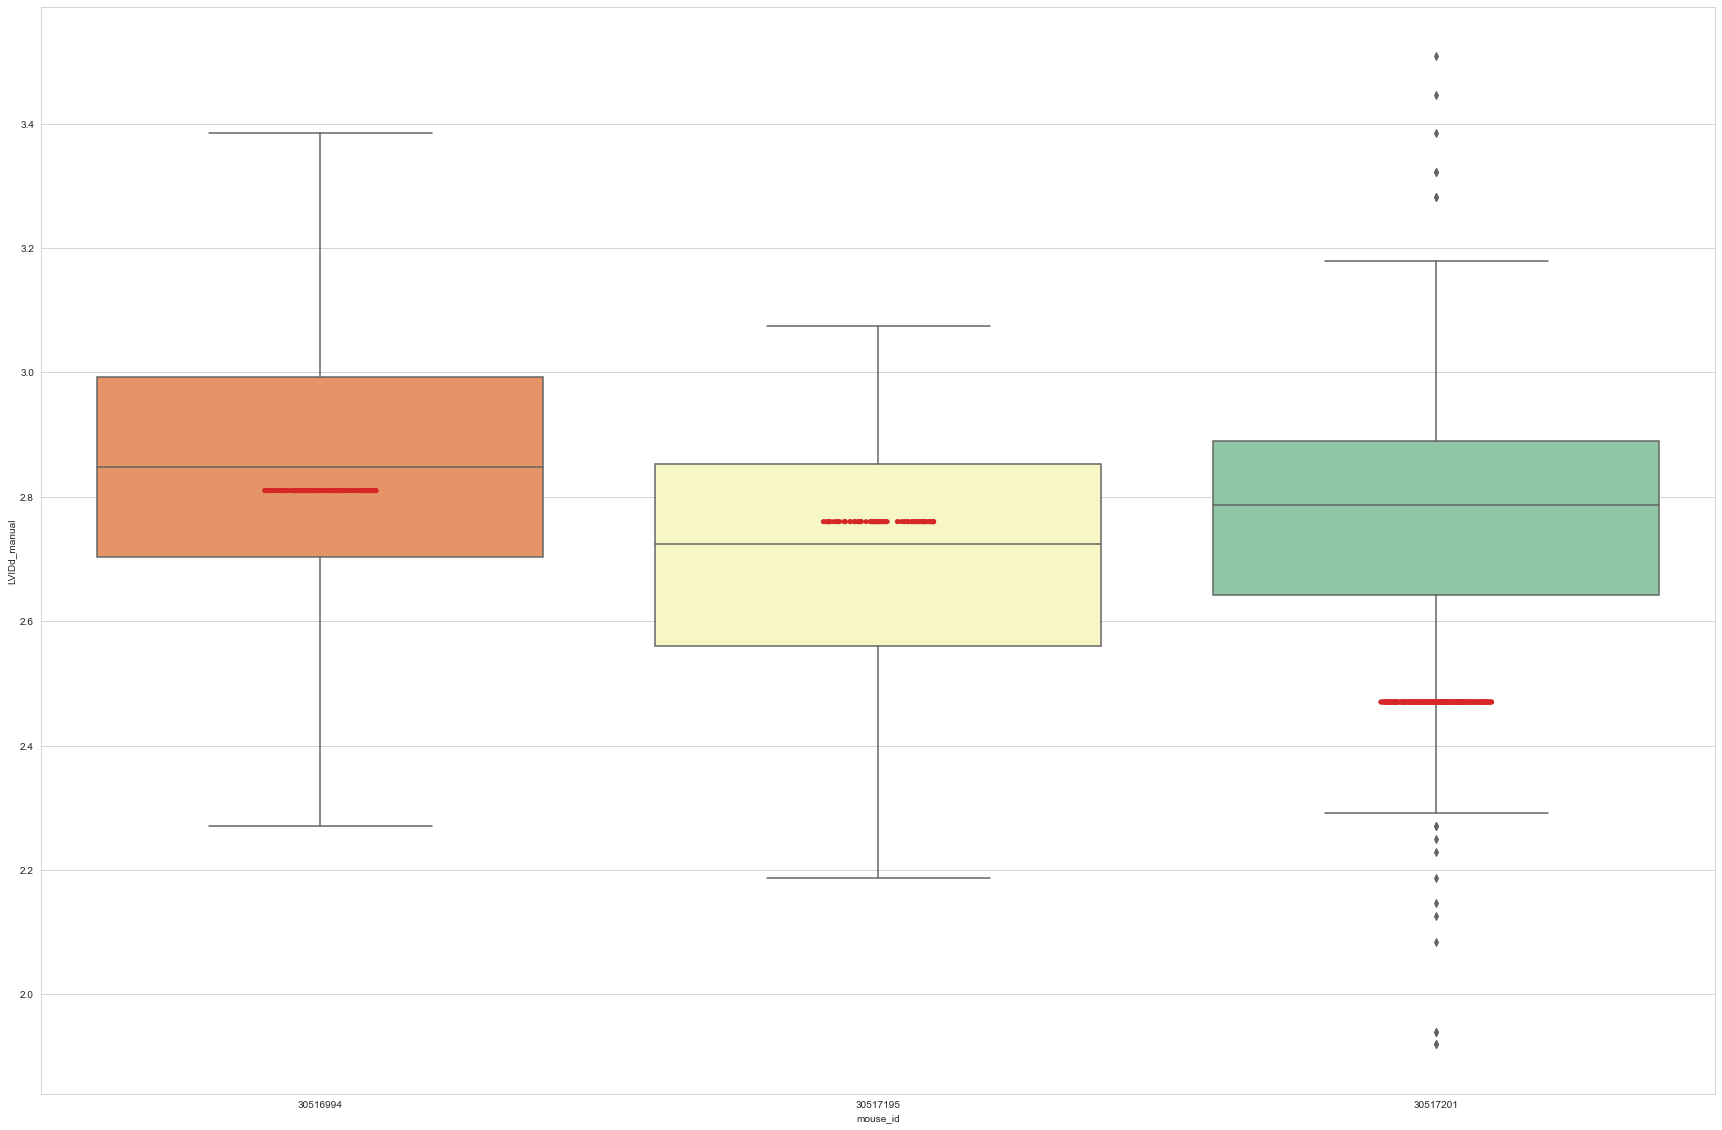

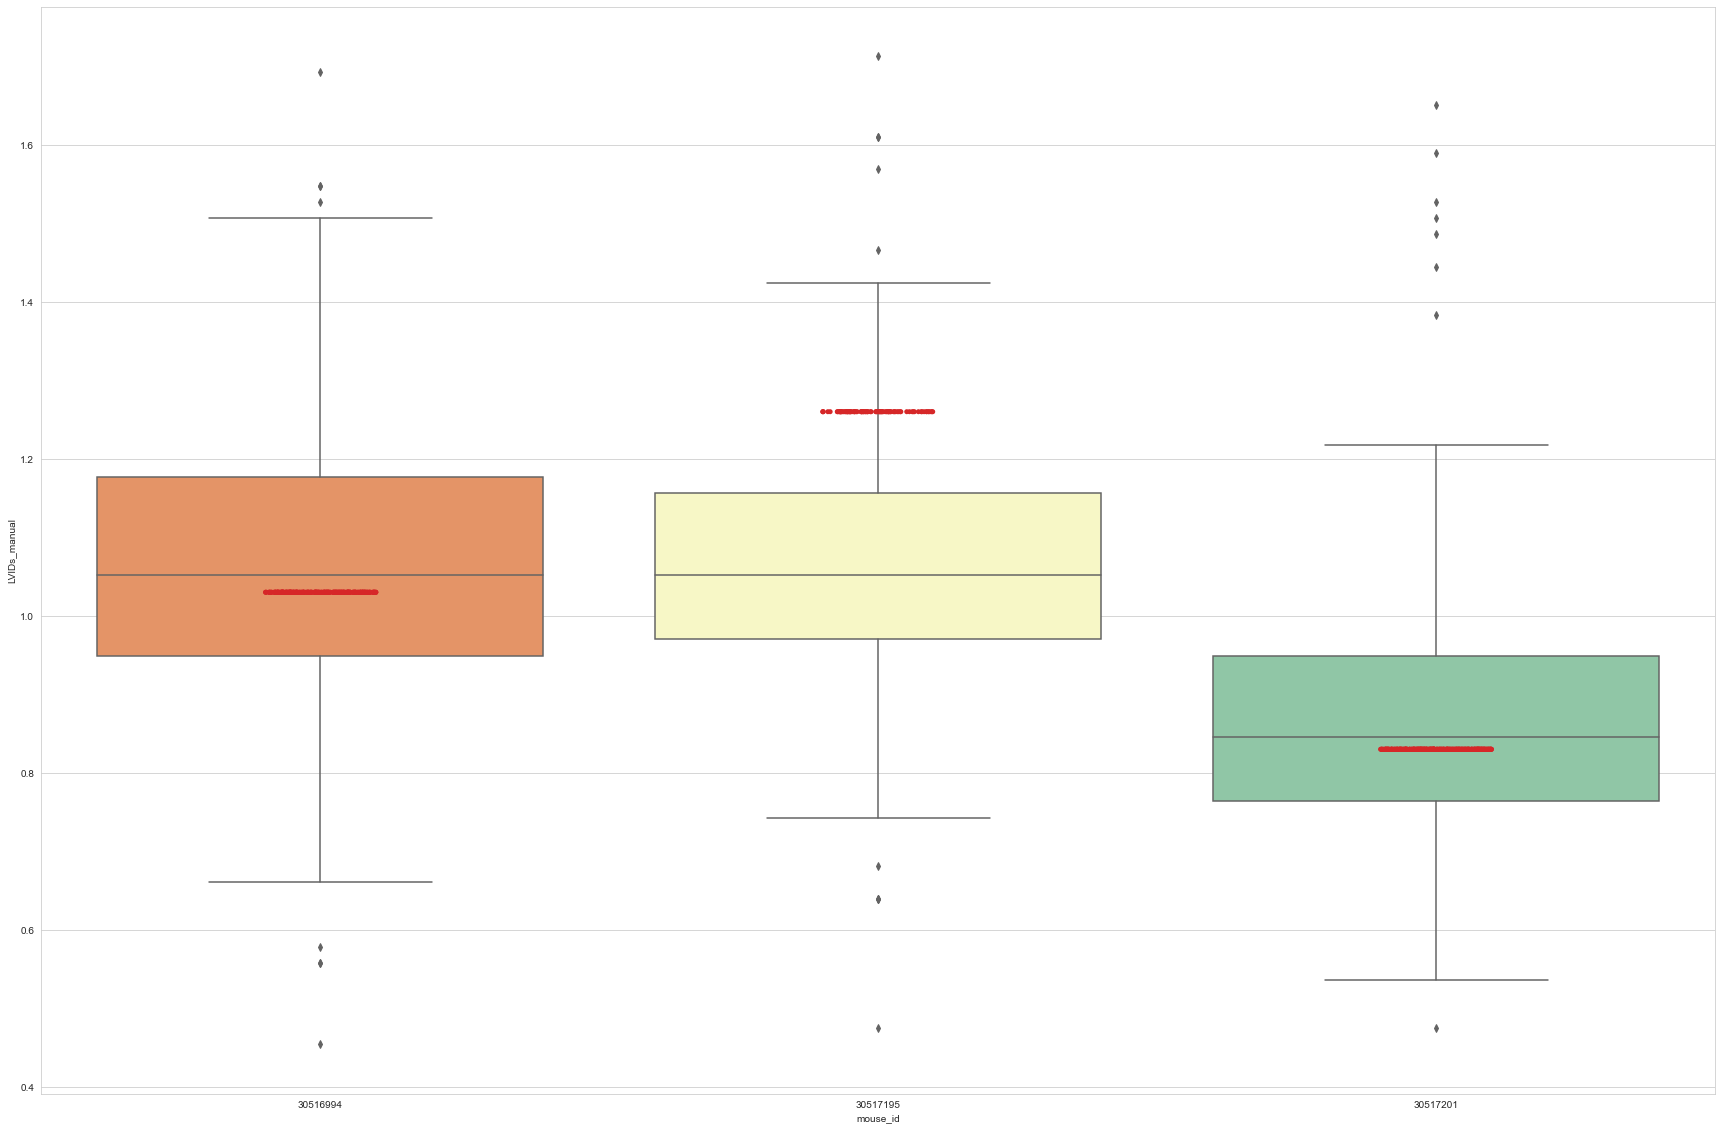

In [7]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

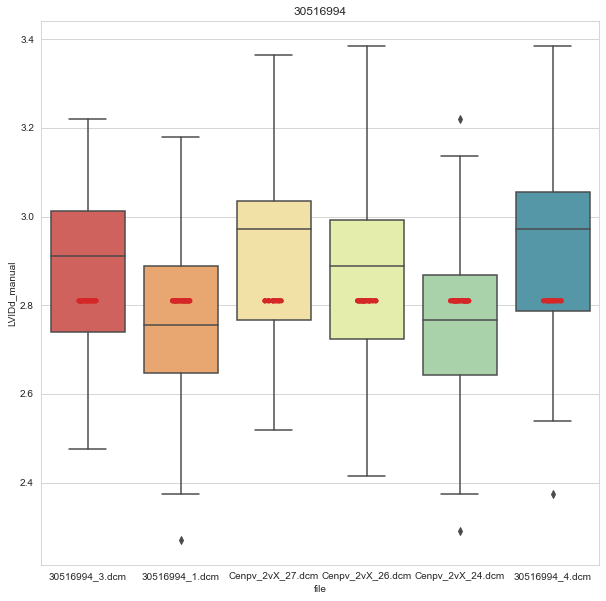

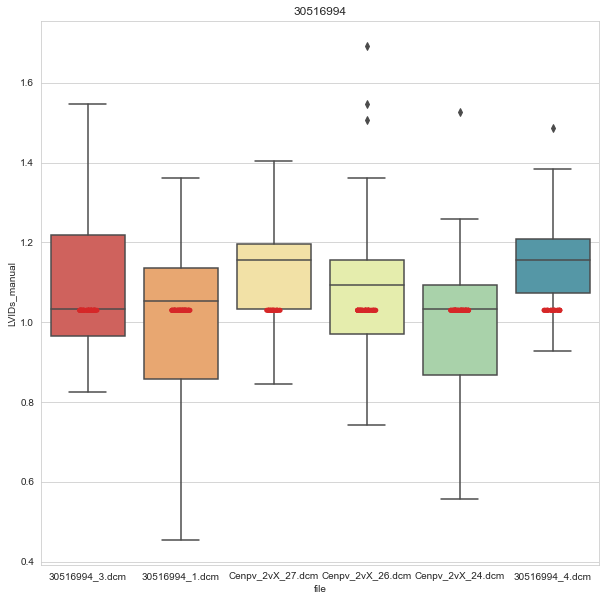

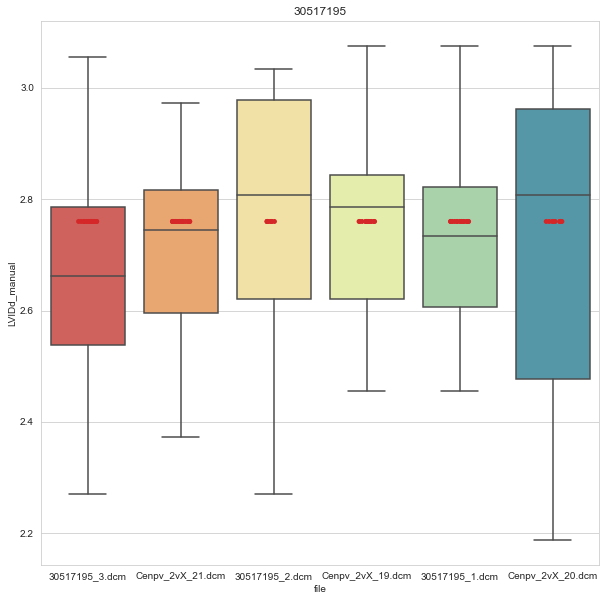

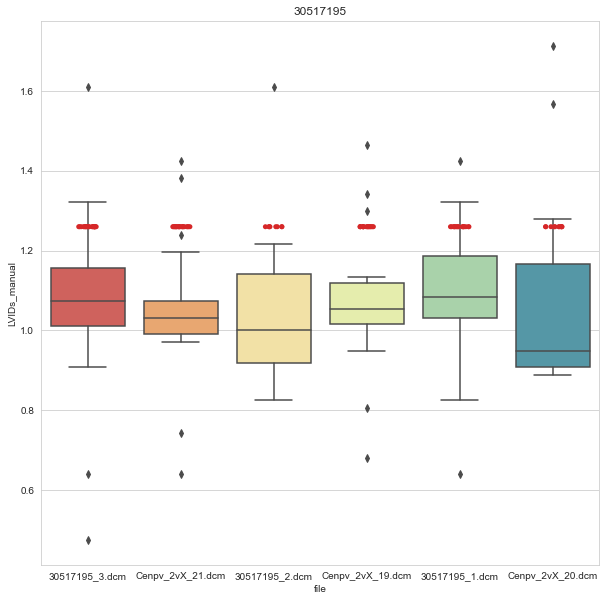

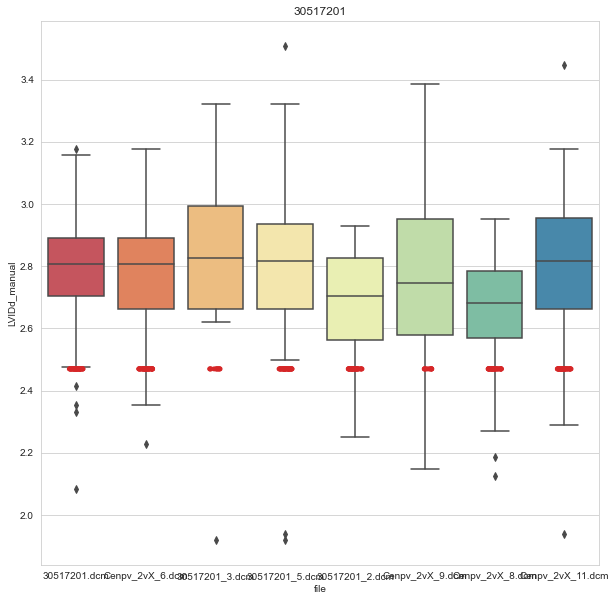

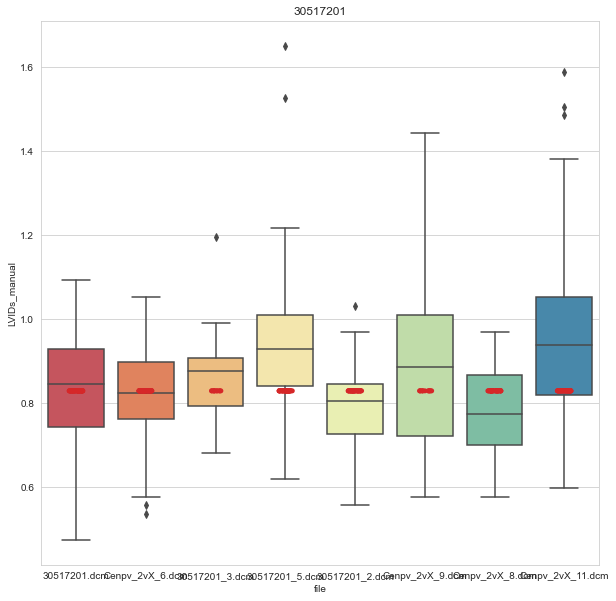

In [8]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [9]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
237,30516994,Cenpv_2vX_26,84.118554,15.881446
238,30516994,Cenpv_2vX_25,5.293815,94.706185
239,30516994,30516994_3,84.118554,15.881446
240,30516994,Cenpv_2vX_24,100.000000,0.000000
241,30516994,30516994_2,0.000000,100.000000
242,30516994,Cenpv_2vX_27,47.070915,52.929085
243,30516994,30516994_1,100.000000,0.000000
244,30516994,30516994_4,47.070915,52.929085
245,30517195,30517195_3,37.050360,62.949640
246,30517195,30517195_2,21.171634,78.828366


### Image quality per mouse

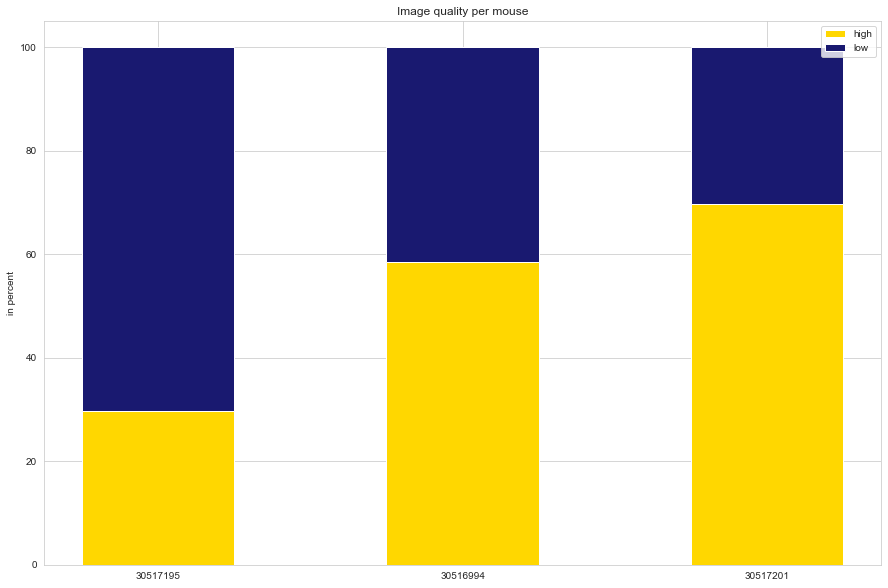

In [10]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

### Image quality per line

In [11]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Cenpv,54.73,45.27


## Calculation of stats

In [12]:
# LVIDs diastole 
lvidd_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [13]:
# LVIDs systole
lvids_stats = filtered_data[['dif_LVIDs']].describe()
lvids_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [14]:
# Ejection Fraction
ef_stats = filtered_data[['dif_EF']].describe()
ef_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [15]:
# Fractional Shortening
fs_stats = filtered_data[['dif_FS']].describe()
fs_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [16]:
stats_df = pd.concat([lvidd_stats,
                      lvids_stats,
                      ef_stats,
                      fs_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,670.00,670.00,670.00,670.00
mean,0.13,0.00,0.25,1.19
std,0.27,0.19,3.85,6.68
min,-0.57,-0.79,-18.44,-23.08
25%,-0.04,-0.12,-1.54,-2.90
50%,0.16,0.00,0.71,1.62
75%,0.32,0.12,2.35,5.67
max,1.04,0.82,12.37,25.67
number of mice,3.00,3.00,3.00,3.00


In [17]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [18]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

In [19]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con']
)
num_stats

,man con,auto con
f,1,1
m,2,2


In [20]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')